# Power Plant Project - 
# Predicting Net Hourly Electrical Energy Output in a Combined-Cycle Power Plant

### Problem Description:

VATA power, a reputed corporation has many power plants throughout the country,
It's most recent instalment being A combined-cycle power plant that uses both gas
and a steam turbine together to produce up to 50 percent more electricity from the
same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine
is routed to the nearby steam turbine, which generates extra power. it has recently
received an official notification from ICES(International council of Energy
sustainability) to submit a report on the combined cycle power plant. You have been
appointed the chief of committee responsible for drafting the report, your task is to
create a Machine Learning Model to predict the net hourly electrical energy output
(PE) of the plant. Your dataset has data over 6 years (2006-2011) when the power
plant was set to work with a full load and contains the following important features
necessary to predict the outcome

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import re

# train_test_split
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#ml Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#tuning
from sklearn.model_selection import GridSearchCV

## 2. Load Data

In [3]:
#load the data
data = pd.read_csv("Electric Station Data.csv")

In [4]:
#view the data
data.head()

,Temp,Vacuum,Pressure,Plant,Humidity,Energy,TempDiff,PressureDiff,RHSquared,Testing Type,Place,PowerPerFuel,TempVacuum
0,29.95,NaN,1011.44#$&!$,Amrita Energy Systems,66.32,432.81,-43.47,938.0200000000001,NaN,Development Phase,Coimbatore,0.196828,2198.929
1,5.76r,40.07,1013.22,Amrita Energy Systems,62.99,494.67,-34.31,973.15II@,3967.7401000000004,Development Phase,Coimbatore,2.143255,230.8032
2,29.44,NaN,1011.4,Amrita Energy Systems,61.78,442.32,-34.89,947.0699999999999,NaN,Development Phase,Coimbatore,0.233553,1893.8752
3,32.83#,74.33,1011.44,Amrita Energy Systems,50.42,427.36,-41.5,937.11,2542.1764000000003,Development Phase,Coimbatore,0.175129,2440.2538999999997
4,16.86,39.63,1004.47,Amrita Energy Systems,83.5,466.68,-22.770000000000003,NaN,6972.25,Development Phase,Coimbatore,0.698454,668.1618


## 3. Exploratory Data Analysis

#### 3.1 shape of data

In [5]:
#shape of the data
data.shape

(19230, 13)

#### 3.2 columns oof teh data

In [6]:
# print column names
data.columns

Index(['Temp', 'Vacuum', 'Pressure', 'Plant', 'Humidity', 'Energy', 'TempDiff',
       'PressureDiff', 'RHSquared', 'Testing Type', 'Place', 'PowerPerFuel',
       'TempVacuum'],
      dtype='object')

#### 3.3 duplicate values

In [7]:
#check for duplicate values
data.duplicated().sum()

12820

In [8]:
#remove duplicate
data = data.drop_duplicates()

# Reset the index
data = data.reset_index(drop=True)

In [9]:
data.shape

(6410, 13)

#### 3.4 basic information

In [10]:
#check for baisc information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          5449 non-null   object 
 1   Vacuum        5449 non-null   object 
 2   Pressure      6410 non-null   object 
 3   Plant         5449 non-null   object 
 4   Humidity      6410 non-null   object 
 5   Energy        6410 non-null   float64
 6   TempDiff      6410 non-null   object 
 7   PressureDiff  5449 non-null   object 
 8   RHSquared     5449 non-null   object 
 9   Testing Type  6410 non-null   object 
 10  Place         6410 non-null   object 
 11  PowerPerFuel  5449 non-null   float64
 12  TempVacuum    5449 non-null   object 
dtypes: float64(2), object(11)
memory usage: 651.1+ KB


#### 3.5 statistical information

In [11]:
# check for statistical information
data.describe()

,Energy,PowerPerFuel
count,6410.000000,5449.000000
mean,454.363276,0.618519
std,17.060129,0.507530
min,420.260000,0.158781
25%,439.832500,0.261322
50%,451.440000,0.403173
75%,468.270000,0.822638
max,495.760000,6.875244


#### 3.6 Null Values

In [12]:
#check for null values
data.isnull().sum()

Temp            961
Vacuum          961
Pressure          0
Plant           961
Humidity          0
Energy            0
TempDiff          0
PressureDiff    961
RHSquared       961
Testing Type      0
Place             0
PowerPerFuel    961
TempVacuum      961
dtype: int64

#### 3.7 Unique values

In [13]:
#check for number of unique values in each column
data.nunique()

Temp            2867
Vacuum          1140
Pressure        2758
Plant              1
Humidity        4186
Energy          3910
TempDiff        4339
PressureDiff    4261
RHSquared       3767
Testing Type       1
Place              1
PowerPerFuel    5436
TempVacuum      5388
dtype: int64

plant, Testing type and Place have only one unique value.. this feature will not be useful for our model. hence, we can remove them while preprocessing

In [14]:
data["Temp"].value_counts()

13.78        12
26.45         8
11.02         7
8.51          7
16.0          7
             ..
12.69         1
24.15easi     1
20.24         1
5.37          1
12.26es       1
Name: Temp, Length: 2867, dtype: int64

In [15]:
data["Vacuum"].value_counts()

70.32         29
41.17         29
69.13         27
66.54         26
51.43         26
              ..
71.14oie       1
35.77i         1
77.17siis      1
35.76nisss     1
70.32niooi     1
Name: Vacuum, Length: 1140, dtype: int64

In [16]:
data["Pressure"].value_counts()

1013.88      12
1013.18      11
1013.92      10
1013.02      10
1012.92      10
             ..
1025.87       1
1012.33       1
1011.5!$&     1
1026.15       1
1014.87       1
Name: Pressure, Length: 2758, dtype: int64

In [17]:
data["Humidity"].value_counts()

100.09    19
82.8       8
79.23      7
71.57      7
84.41      6
          ..
70.47      1
76.17      1
93.62      1
82.94      1
97.7       1
Name: Humidity, Length: 4186, dtype: int64

In [18]:
data["Energy"].value_counts()

440.26    7
447.06    7
436.37    6
465.89    6
464.70    6
         ..
478.47    1
449.47    1
457.85    1
467.34    1
474.67    1
Name: Energy, Length: 3910, dtype: int64

In [19]:
data["TempDiff"].value_counts()

-31.29                 8
-29.42                 7
-37.75                 6
-37.69                 6
-35.42                 6
                      ..
-39.41                 1
-25.85                 1
-47.580000000000005    1
-20.560000000000002    1
-28.919999999999995    1
Name: TempDiff, Length: 4339, dtype: int64

In [20]:
data["PressureDiff"].value_counts()

979.98                   6
958.5                    5
938.75                   5
975.6                    5
936.63                   5
                        ..
975.22                   1
962.15                   1
966.5400000000001I$@!    1
955.5500000000001I       1
977.5400000000001        1
Name: PressureDiff, Length: 4261, dtype: int64

In [21]:
data["RHSquared"].value_counts()

10018.008100000001    15
7264.152900000001      6
8074.8196              6
6855.839999999999      6
6748.622500000001      5
                      ..
989.1025               1
5830.8496              1
2955.0096              1
5389.0280999999995     1
9545.29                1
Name: RHSquared, Length: 3767, dtype: int64

In [22]:
data["PowerPerFuel"].value_counts()

1.855189    2
0.204992    2
0.228042    2
1.181638    2
1.968016    2
           ..
0.517005    1
0.237536    1
0.593863    1
0.193412    1
0.991537    1
Name: PowerPerFuel, Length: 5436, dtype: int64

In [23]:
data["TempVacuum"].value_counts()

1115.4385                 5
389.988                   4
576.2474                  3
417.8858                  3
1173.1664                 3
                         ..
1307.8536000000001eiIN    1
692.1826000000001         1
1915.5923es               1
1958.2084                 1
476.4625                  1
Name: TempVacuum, Length: 5388, dtype: int64

#### visualizing unique values

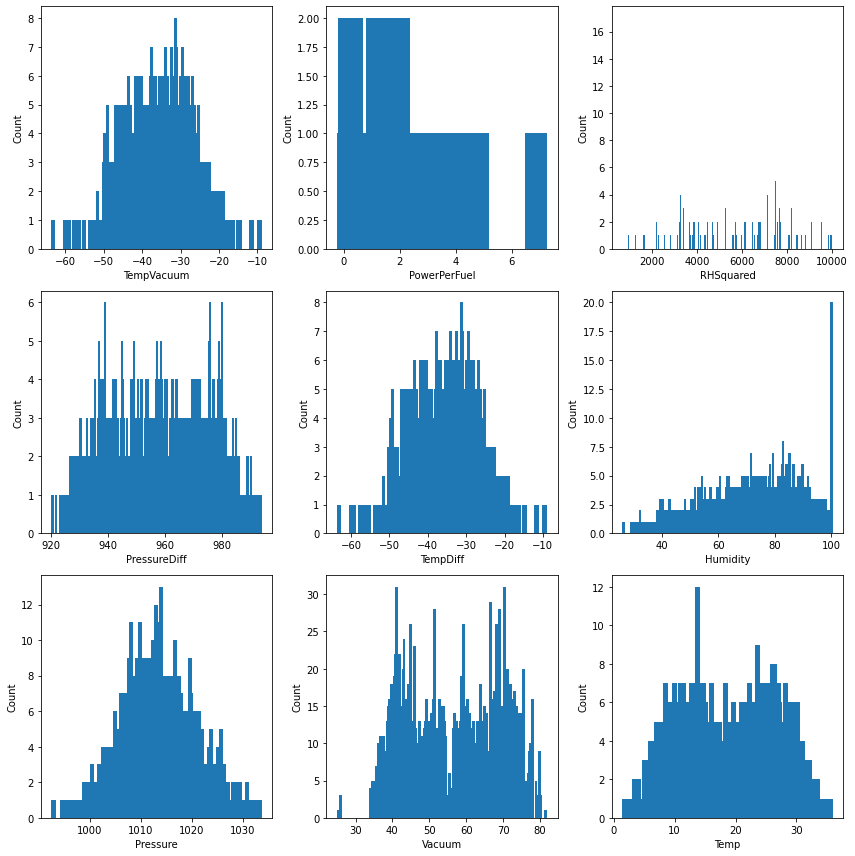

In [69]:
attributes = ["TempVacuum", "PowerPerFuel", "RHSquared", "PressureDiff", "TempDiff", "Humidity", "Pressure", "Vacuum", "Temp"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for ax, attr in zip(axes.flatten(), attributes):
    attr_counts = data[attr].value_counts()
    ax.bar(attr_counts.index, attr_counts.values)
    ax.set_xlabel(attr)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


## 4. Preprocessing

In [26]:
#check for data type of each feature
data.dtypes

Temp             object
Vacuum           object
Pressure         object
Plant            object
Humidity         object
Energy          float64
TempDiff         object
PressureDiff     object
RHSquared        object
Testing Type     object
Place            object
PowerPerFuel    float64
TempVacuum       object
dtype: object

### 4.1 Replacing alphanumeric values with numeric values

as we can see the data, there rea lots of entires where we have symbols with the dta. whcih is totally unneceassary. hence we need to remove thosee unwnated synmbols

library : import re

In [27]:
data["Temp"] = data["Temp"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["Vacuum"] = data["Vacuum"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["Pressure"] = data["Pressure"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["Humidity"] = data["Humidity"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["PressureDiff"] = data["PressureDiff"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["RHSquared"] = data["RHSquared"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))
data["TempVacuum"] = data["TempVacuum"].apply(lambda x : re.sub(r'[^0-9.]+','',str(x)))

data['TempDiff'] = data['TempDiff'].apply(lambda x: re.sub(r'[^-0-9.]', '', x))

In [28]:
#view the data
data.head()

,Temp,Vacuum,Pressure,Plant,Humidity,Energy,TempDiff,PressureDiff,RHSquared,Testing Type,Place,PowerPerFuel,TempVacuum
0,29.95,,1011.44,Amrita Energy Systems,66.32,432.81,-43.47,938.0200000000001,,Development Phase,Coimbatore,0.196828,2198.929
1,5.76,40.07,1013.22,Amrita Energy Systems,62.99,494.67,-34.31,973.15,3967.7401000000004,Development Phase,Coimbatore,2.143255,230.8032
2,29.44,,1011.4,Amrita Energy Systems,61.78,442.32,-34.89,947.0699999999999,,Development Phase,Coimbatore,0.233553,1893.8752
3,32.83,74.33,1011.44,Amrita Energy Systems,50.42,427.36,-41.5,937.11,2542.1764000000003,Development Phase,Coimbatore,0.175129,2440.2538999999997
4,16.86,39.63,1004.47,Amrita Energy Systems,83.5,466.68,-22.770000000000003,,6972.25,Development Phase,Coimbatore,0.698454,668.1618


### 4.2 Drop columns

In [30]:
#remove unnecessary columns
data = data.drop(["Plant","Testing Type","Place"],axis = 1)

In [31]:
#check for data shape after removing columns
data.shape

(6410, 10)

In [32]:
#view data
data.head()

,Temp,Vacuum,Pressure,Humidity,Energy,TempDiff,PressureDiff,RHSquared,PowerPerFuel,TempVacuum
0,29.95,,1011.44,66.32,432.81,-43.47,938.0200000000001,,0.196828,2198.929
1,5.76,40.07,1013.22,62.99,494.67,-34.31,973.15,3967.7401000000004,2.143255,230.8032
2,29.44,,1011.4,61.78,442.32,-34.89,947.0699999999999,,0.233553,1893.8752
3,32.83,74.33,1011.44,50.42,427.36,-41.5,937.11,2542.1764000000003,0.175129,2440.2538999999997
4,16.86,39.63,1004.47,83.5,466.68,-22.770000000000003,,6972.25,0.698454,668.1618


### 4.3 converting object type features into float type

In [33]:
#check for data type of each feature
data.dtypes

Temp             object
Vacuum           object
Pressure         object
Humidity         object
Energy          float64
TempDiff         object
PressureDiff     object
RHSquared        object
PowerPerFuel    float64
TempVacuum       object
dtype: object

In [34]:
# Convert the  columns from string to float

data['Temp'] = data['Temp'].apply(lambda x: float(x) if x else float('nan'))
data['Pressure'] = data['Pressure'].apply(lambda x: float(x) if x else float('nan'))
data['Vacuum'] = data['Vacuum'].apply(lambda x: float(x) if x else float('nan'))
data['Humidity'] = data['Humidity'].apply(lambda x: float(x) if x else float('nan'))
data['TempDiff'] = data['TempDiff'].apply(lambda x: float(x) if x else float('nan'))
data['RHSquared'] = data['RHSquared'].apply(lambda x: float(x) if x else float('nan'))
data['PressureDiff'] = data['PressureDiff'].apply(lambda x: float(x) if x else float('nan'))
data['TempVacuum'] = data['TempDiff'].apply(lambda x: float(x) if x else float('nan'))

In [35]:
#check for data type of each feature after conversion
data.dtypes

Temp            float64
Vacuum          float64
Pressure        float64
Humidity        float64
Energy          float64
TempDiff        float64
PressureDiff    float64
RHSquared       float64
PowerPerFuel    float64
TempVacuum      float64
dtype: object

### 4.4 Handle Null Values

In [36]:
#drop null values
data_new = data.dropna()

In [37]:
#check the shape
data_new.shape

(2857, 10)

### 4.5 Correlation

In [38]:
# Calculate the correlation matrix
correlation_matrix = data_new.corr()
correlation_matrix

,Temp,Vacuum,Pressure,Humidity,Energy,TempDiff,PressureDiff,RHSquared,PowerPerFuel,TempVacuum
Temp,1.000000,0.843694,-0.500807,-0.553799,-0.950576,-0.425443,-0.847792,-0.551574,-0.879417,-0.425443
Vacuum,0.843694,1.000000,-0.423846,-0.312091,-0.868891,-0.844762,-0.941916,-0.313583,-0.744699,-0.844762
Pressure,-0.500807,-0.423846,1.000000,0.098586,0.510863,0.215287,0.703417,0.090666,0.392314,0.215287
Humidity,-0.553799,-0.312091,0.098586,1.000000,0.400779,-0.025936,0.281471,0.992591,0.401499,-0.025936
Energy,-0.950576,-0.868891,0.510863,0.400779,1.000000,0.517190,0.871294,0.401439,0.878874,0.517190
TempDiff,-0.425443,-0.844762,0.215287,-0.025936,0.517190,1.000000,0.742758,-0.021203,0.378761,1.000000
PressureDiff,-0.847792,-0.941916,0.703417,0.281471,0.871294,0.742758,1.000000,0.279705,0.729875,0.742758
RHSquared,-0.551574,-0.313583,0.090666,0.992591,0.401439,-0.021203,0.279705,1.000000,0.409154,-0.021203
PowerPerFuel,-0.879417,-0.744699,0.392314,0.401499,0.878874,0.378761,0.729875,0.409154,1.000000,0.378761
TempVacuum,-0.425443,-0.844762,0.215287,-0.025936,0.517190,1.000000,0.742758,-0.021203,0.378761,1.000000


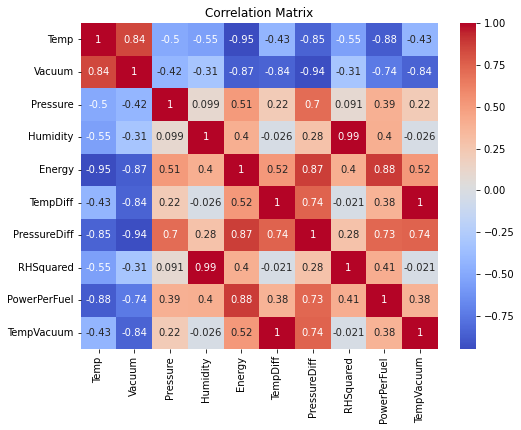

In [39]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Define X and y

In [40]:
X = data_new.drop("Energy", axis = 1)
y = data_new["Energy"]

In [41]:
#print X
X

,Temp,Vacuum,Pressure,Humidity,TempDiff,PressureDiff,RHSquared,PowerPerFuel,TempVacuum
1,5.76,40.07,1013.22,62.99,-34.31,973.15,3967.7401,2.143255,-34.31
3,32.83,74.33,1011.44,50.42,-41.50,937.11,2542.1764,0.175129,-41.50
6,24.56,66.75,1018.50,77.47,-42.19,951.75,6001.6009,0.265363,-42.19
7,18.83,47.83,1005.58,77.07,-29.00,957.75,5939.7849,0.504342,-29.00
9,22.09,65.59,1015.54,72.44,-43.50,949.95,5247.5536,0.308707,-43.50
...,...,...,...,...,...,...,...,...,...
6403,19.29,50.16,1010.49,97.78,-30.87,960.33,9560.9284,0.465292,-30.87
6404,23.50,50.78,1008.70,57.70,-27.28,957.92,3329.2900,0.372981,-27.28
6405,23.39,61.87,1010.35,48.91,-38.48,948.48,2392.1881,0.306833,-38.48
6408,12.26,41.50,1014.87,89.41,-29.24,973.37,7994.1481,0.925981,-29.24


In [42]:
#print y
y

1       494.67
3       427.36
6       435.03
7       454.23
9       447.28
         ...  
6403    450.21
6404    445.09
6405    444.03
6408    471.13
6409    472.43
Name: Energy, Length: 2857, dtype: float64

## 6.Split train and test data

module : from sklearn.model_selection import train_test_split

In [43]:
#split data into test and train with 80% train data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [44]:
#check for the shape of train data
X_train.shape

(2285, 9)

In [45]:
#check for the shape of test data
X_test.shape

(572, 9)

## 7. Scaling Data

In [46]:
#initialize StandardScaler
SS = StandardScaler()

In [47]:
# fit StandardScaler to train data
X_train = SS.fit_transform(X_train)

In [48]:
#using StandardScaler to test data
X_test = SS.transform(X_test)

In [49]:
#print train data
X_train

array([[-0.62374615, -1.0139604 ,  0.66597523, ..., -0.76565884,
         0.24500601,  1.09295457],
       [ 0.47818564,  0.75173151, -0.17550822, ...,  0.64402855,
        -0.64637876, -0.79459807],
       [-0.21502963, -0.83762737, -0.77608986, ..., -0.00835126,
        -0.09508853,  1.20210782],
       ...,
       [ 0.77871249,  0.39591664,  0.12394613, ..., -0.09101729,
        -0.66901932,  0.10658186],
       [-0.2644496 , -0.95413312,  0.60574978, ..., -0.91455085,
         0.01990685,  1.34986406],
       [ 0.71059307,  0.63286415, -0.52682339, ..., -0.32792315,
        -0.68273328, -0.36197846]])

In [50]:
#print test data
X_test

array([[ 1.73505572,  1.33898348, -1.5941523 , ..., -1.78526774,
        -0.88022117, -0.5350263 ],
       [ 2.06363174,  1.14769363, -1.1893034 , ..., -1.01301681,
        -0.89617515,  0.11589982],
       [ 0.9323151 ,  1.0492935 , -1.45028038, ...,  0.24355072,
        -0.77352602, -0.84518128],
       ...,
       [ 0.58904666,  0.95876538, -0.56028197, ..., -0.82967568,
        -0.69831081, -1.03420277],
       [-0.44476571, -0.27399143,  0.13063784, ...,  2.14046447,
        -0.14607006,  0.02005794],
       [-0.21502963, -0.17952731, -1.1491531 , ...,  2.14046447,
        -0.28265592,  0.08927707]])

## 8. Model Building and Evaluation

### 8.1  Linear Regression

module :

        from sklearn.linear_model import LinearRegression
        from sklearn.model_selection import GridSearchCV

In [51]:
## define hyper parameters
param_grid_lr = {'fit_intercept': [True, False], 'copy_X' : [True, False], 'positive': [True, False]}

grid_lr = GridSearchCV(LinearRegression(),param_grid_lr, cv = 5 , verbose = 2 )

#fit the model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, po

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=2)

In [52]:
#check for best parameters
grid_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [53]:
#predict the model
y_pred_lr = grid_lr.predict(X_test)

In [54]:
# evaluation the model

print("Mean squared error : ", mean_squared_error(y_test, y_pred_lr))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_lr))
print("R2 score : ", r2_score(y_test, y_pred_lr))

Mean squared error :  20.485333547357705
Mean absolute error :  3.707556602482927
R2 score :  0.9287155468202767


### 8.2 Decision Tree Regressor

module : from sklearn.tree import DecisionTreeRegressor

In [55]:
# define hyper parameters
param_grid_dt = {"max_depth" : [5,10, 20, 50]}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv =5, verbose = 2)

#fit the model
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=20; total time=   0.0s
[CV] END .......................................m

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20, 50]}, verbose=2)

In [56]:
#check for best parameters
grid_dt.best_params_

{'max_depth': 5}

In [57]:
#predict the model
y_pred_dt = grid_dt.predict(X_test)

In [58]:
#evaluate the model

print("Mean squared error : ", mean_squared_error(y_test, y_pred_dt))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_dt))
print("R2 score : ", r2_score(y_test, y_pred_dt))

Mean squared error :  17.56886141825935
Mean absolute error :  3.331120347679064
R2 score :  0.938864228092957


### 8.3 Random Forest regressor

module : from sklearn.ensemble import RandomForestRegressor

In [60]:
# define hyper parameters
param_grid_rf = {'n_estimators':[10,50,100,500], 'max_depth': [5,10,20,50]}

grid_rf = GridSearchCV(RandomForestRegressor(),param_grid_rf, cv = 5, verbose = 2)

#fit the model
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.4s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=5, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 50],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [61]:
# best parameters
grid_rf.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [62]:
#predict the model
y_pred_rf = grid_rf.predict(X_test)

In [63]:
#evaluate the model

print("Mean squared error : ", mean_squared_error(y_test, y_pred_rf))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_rf))
print("R2 score : ", r2_score(y_test, y_pred_rf))

Mean squared error :  12.19708627771097
Mean absolute error :  2.722428418721441
R2 score :  0.9575568235839303


### 8.4 KNN Regressor

module : from sklearn.neighbors import KNeighborsRegressor

In [65]:
# define hyper parameters
param_grid_knn ={'n_neighbors': [5,10,20,50]}

grid_knn = GridSearchCV(KNeighborsRegressor(),param_grid_knn, cv = 5, verbose = 2)

#fit the model
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=20; total time=   0.0s
[CV] END .....................................n_n

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 20, 50]}, verbose=2)

In [66]:
#best parameters
grid_knn.best_params_

{'n_neighbors': 5}

In [67]:
#predict the model
y_pred_knn = grid_knn.predict(X_test)

In [68]:
# evaluate the model

print("Mean squared error : ", mean_squared_error(y_test, y_pred_knn))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_knn))
print("R2 score : ", r2_score(y_test, y_pred_knn))

Mean squared error :  16.81877707692308
Mean absolute error :  3.1828321678321667
R2 score :  0.9414743565532635


## 9.Model Comparison

Linear Regresssion :
    
        Mean squared error :  20.485333547357705
        Mean absolute error :  3.707556602482927
        R2 score :  0.9287155468202767
        
K Neighbors Regressor :

        Mean squared error :  16.81877707692308
        Mean absolute error :  3.1828321678321667
        R2 score :  0.9414743565532635
        
Random Forest Regressor: 
        
        Mean squared error :  12.19708627771097
        Mean absolute error :  2.722428418721441
        R2 score :  0.9575568235839303
        
Decision Tree Regressor:
        
        Mean squared error :  17.56886141825935
        Mean absolute error :  3.331120347679064
        R2 score :  0.938864228092957
       

The results  show the evaluation metrics for four different regression models: 

Linear Regression, K Neighbors Regressor, Random Forest Regressor, and Decision Tree Regressor. 

These metrics are commonly used to assess the performance of regression models. Here's a brief explanation of each metric:

**Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted and actual values. It gives an idea of how close the predicted values are to the actual values, with lower values indicating better performance.

**Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of errors, regardless of their direction.

**R2 Score (Coefficient of Determination)**: R2 score represents the proportion of the variance in the target variable that can be explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

Based on the results , it appears that the **Random Forest Regressor** has the **lowest mean squared error (12.197) and mean absolute error (2.722)**, indicating better performance in terms of minimizing the prediction errors. Additionally, it has the **highest R2 score (0.958)**, suggesting a better fit of the model to the data compared to the other models.

## 10. Final Model

### Random Forest Regressor

In [70]:
final_model = RandomForestRegressor(max_depth=20, n_estimators=500)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


In [71]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 12.202818111930162
Mean Absolute Error: 2.719547145841835
R2 Score: 0.9575368780620725


## Conclusion

Throughout the project, several steps were undertaken, including exploratory data analysis (EDA), preprocessing, handling null values, dropping unwanted columns, and applying standard scaling. Afterward, four different regression models were compared to predict the net hourly electrical energy output of the combined-cycle power plant. Among these models, the **Random Forest Regressor with the best parameters (max-depth = 20, n_estimators = 500) was selected.**

The performance of the selected Random Forest Regressor model was evaluated using the following metrics: 

        Mean Absolute Error (MAE)        
        Mean Squared Error (MSE)
        R2 Score
        
Based on these evaluation metrics, the **Random Forest Regressor model with a max depth of 20 and 500 estimators demonstrated superior performance**. It achieved a relatively low MAE and MSE, indicating accurate predictions with minimal errors. Additionally, the high R2 score suggests that the model captured the underlying patterns and relationships in the data effectively.

Overall, the project involved extensive data exploration, preprocessing, and model selection. The Random Forest Regressor, with the specified parameters, proved to be the best model for **predicting the net hourly electrical energy output of the combined-cycle power plant**, achieving impressive accuracy as indicated by the MAE, MSE, and R2 score.        